In [ ]:
import sqlite3
from sqlite3 import Error
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
connection=sqlite3.connect('chinook.db')

In [ ]:
def create_connection(path):
    connection=None
    try:
        connection=sqlite3.connect(path)
        print('Connection to DB succesful!')
    except Error as e:
        print(f"The error '{e}' occured.")
    return connection

In [ ]:
create_connection('chinook.db')

Connection to DB succesful!


In [ ]:
def execute_read_query(connection, query):
    cursor = connection.cursor()
    result = None
    try:
        cursor.execute(query)
        result=cursor.fetchall()
        return result
    except Error as e:
        print(f"The Error '{e}' occurred.")

## 2.1

In [ ]:
q1='''
    SELECT employees.EmployeeId, employees.FirstName, employees.LastName, COUNT(customers.CustomerId) AS TOTAL_TRANSACTION, SUM(invoices.Total) AS Total
    FROM employees JOIN customers ON employees.EmployeeId= customers.SupportRepId JOIN invoices ON customers.CustomerId= invoices.CustomerId
    GROUP BY employees.EmployeeId, employees.FirstName, employees.LastName
    ORDER BY 4 DESC
'''

out1= execute_read_query(connection, q1)
out1

[(3, 'Jane', 'Peacock', 146, 833.0400000000013),
 (4, 'Margaret', 'Park', 140, 775.4000000000011),
 (5, 'Steve', 'Johnson', 126, 720.160000000001)]

In [ ]:
name_df= pd.DataFrame(data = out1, columns=['EmployeeId','FirstName','LastName','Total_Transaction','Total'])
name_df

,EmployeeId,FirstName,LastName,Total_Transaction,Total
0,3,Jane,Peacock,146,833.04
1,4,Margaret,Park,140,775.40
2,5,Steve,Johnson,126,720.16


ANS:
We are promoting Jane Peacock because she has the highest total transaction and sale.

## 2.2

In [ ]:
q2='''
    SELECT invoices.CustomerId, invoices.InvoiceDate
    FROM invoices
    ORDER BY 1
'''

out2= execute_read_query(connection, q2)
#out2

In [ ]:
df1= pd.DataFrame(data = out2, columns=['CustomerId','Invoicesdate'])
#df1[0:5]

In [ ]:
df1.dtypes

CustomerId       int64
Invoicesdate    object
dtype: object

In [ ]:
df1['Invoicesdate'] = pd.to_datetime(df1['Invoicesdate'])

In [ ]:
df1['VisitFrequency'] = df1.groupby('CustomerId')['Invoicesdate'].diff().dt.days

In [ ]:
df1.head()

,CustomerId,Invoicesdate,VisitFrequency
0,1,2010-03-11,NaN
1,1,2010-06-13,94.0
2,1,2010-09-15,94.0
3,1,2011-05-06,233.0
4,1,2012-10-27,540.0


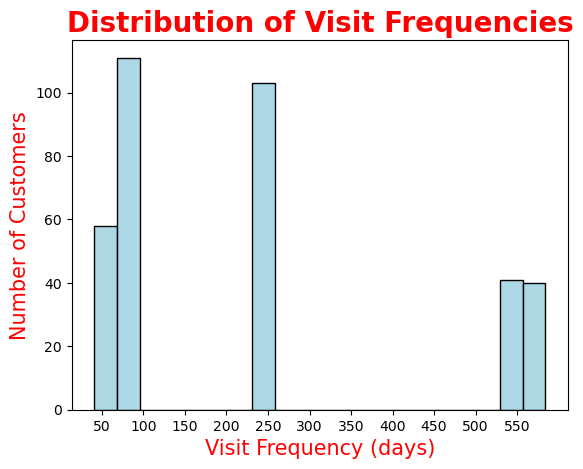

In [ ]:
#2.2
plt.hist(df1['VisitFrequency'], bins=20, color='lightblue', edgecolor='black')
plt.title('Distribution of Visit Frequencies', fontsize=20, color='red', weight='bold')
plt.xlabel('Visit Frequency (days)', fontsize=15, color='red')
plt.ylabel('Number of Customers', fontsize=15, color='red')
plt.xticks(np.arange(50, 600, 50))
plt.show()

## 2.3

In [ ]:
q3='''
    SELECT albums.Title AS Albumn_Title ,artists.Name AS Artist,genres.Name AS Genre, SUM(invoice_items.Quantity) AS Amount_sold
FROM invoice_items JOIN tracks ON invoice_items.TrackId=tracks.TrackId JOIN genres ON tracks.GenreId=genres.GenreId JOIN albums
ON tracks.AlbumId=albums.AlbumId JOIN artists ON artists.ArtistId=albums.ArtistId
GROUP BY albums.AlbumId ORDER BY 4 DESC;
'''

out3= execute_read_query(connection, q3)
#out3

In [ ]:
df3= pd.DataFrame(data = out3, columns=['Album', 'Artist', 'Genre', 'Amount Sold'])
df5 = df3.head(50)
df6 = df5.groupby(['Genre']).sum()
df6s = df6.sort_values(by='Amount Sold', ascending = False)

Text(0.5, 0, 'Amount Sold')

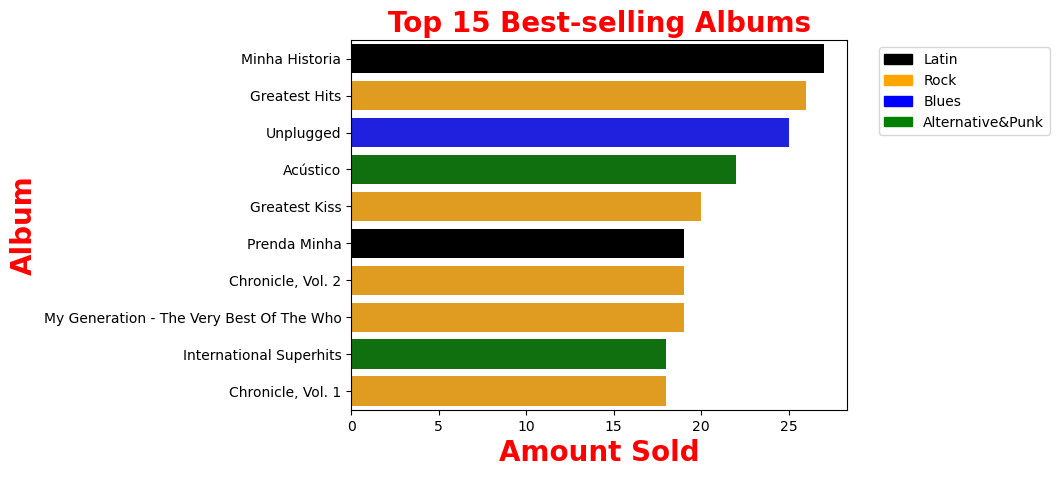

In [ ]:
df7 = df5.head(10)
c = ['black', 'orange', 'blue', 'green', 'orange', 'black', 'orange','orange', 'green', 'orange']
r = {'fontsize': 20, 'weight': 'bold', 'color': 'red'}
sns.barplot(x=df7['Amount Sold'], y=df7['Album'], data=df7, palette=c)
legend_labels = ['Latin', 'Rock', 'Blues', 'Alternative&Punk']
handles = [plt.Rectangle((0,0),1,1, color=color) for color in c]
plt.legend(handles, legend_labels, bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title('Top 15 Best-selling Albums', fontdict = r)
plt.ylabel('Album', fontdict = r)
plt.xlabel('Amount Sold', fontdict = r)

Text(0.5, 0, 'Total Amount Sold')

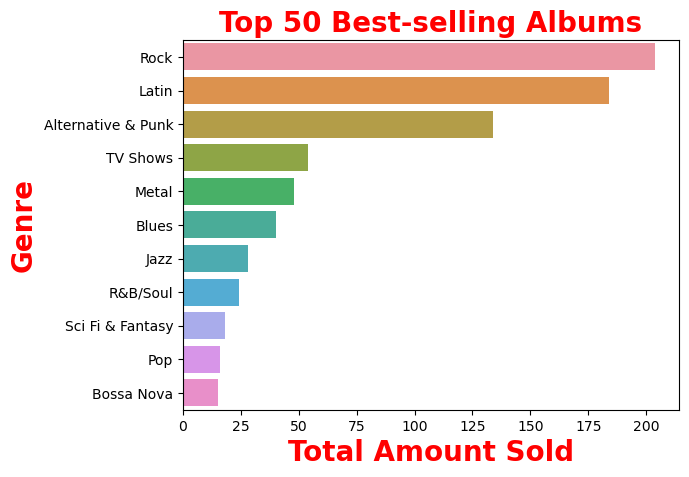

In [ ]:
sns.barplot(x=df6s['Amount Sold'], y=df6s.index, data=df6s, orient='h')
plt.title('Top 50 Best-selling Albums', fontdict = r)
plt.ylabel('Genre', fontdict = r)
plt.xlabel('Total Amount Sold', fontdict = r)

In [ ]:
#2.3 Most popular genre for top 50 best-selling albums
df8 = df3.groupby(['Genre']).sum()
df8s = df8.sort_values(by='Amount Sold', ascending = False)
df8s

,Amount Sold
Genre,
Rock,847
Latin,373
Metal,260
Alternative & Punk,244
Jazz,80
TV Shows,75
Blues,74
Classical,41
R&B/Soul,41


## 2.4

In [ ]:
q4='''
    With CTE as (SELECT c.FirstName, c.LastName, C.Address, c.Phone, c.Email, SUM(i.total) As Total_amount,
dense_rank() OVER (ORDER BY SUM(i.total) DESC) As spending_rank
FROM customers c
JOIN invoices i ON c.CustomerId=i.CustomerId
GROUP BY c.CustomerId
ORDER BY spending_rank)
SELECT * FROM CTE
WHERE spending_rank=2 OR spending_rank=3 OR spending_rank=5 OR spending_rank=8 OR spending_rank=12

'''

out4= execute_read_query(connection, q4)

In [ ]:
#2.4
df4= pd.DataFrame(data = out4, columns=['FirstName','LastName', 'Address', 'Phone', 'Email', 'Total_amount','Spending_rank'])
df4

,FirstName,LastName,Address,Phone,Email,Total_amount,Spending_rank
0,Richard,Cunningham,2211 W Berry Street,+1 (817) 924-7272,ricunningham@hotmail.com,47.62,2
1,Luis,Rojas,"Calle Lira, 198",+56 (0)2 635 4444,luisrojas@yahoo.cl,46.62,3
2,Julia,Barnett,302 S 700 E,+1 (801) 531-7272,jubarnett@gmail.com,43.62,5
3,Terhi,Hämäläinen,Porthaninkatu 9,+358 09 870 2000,terhi.hamalainen@apple.fi,41.62,8
4,Luís,Gonçalves,"Av. Brigadeiro Faria Lima, 2170",+55 (12) 3923-5555,luisg@embraer.com.br,39.62,12
5,François,Tremblay,1498 rue Bélanger,+1 (514) 721-4711,ftremblay@gmail.com,39.62,12
6,Bjørn,Hansen,Ullevålsveien 14,+47 22 44 22 22,bjorn.hansen@yahoo.no,39.62,12
7,Dan,Miller,541 Del Medio Avenue,+1 (650) 644-3358,dmiller@comcast.com,39.62,12
8,Heather,Leacock,120 S Orange Ave,+1 (407) 999-7788,hleacock@gmail.com,39.62,12
9,Wyatt,Girard,"9, Place Louis Barthou",+33 05 56 96 96 96,wyatt.girard@yahoo.fr,39.62,12
